In [1]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline
%matplotlib inline

# Reading whale returns

#whale_returns = Path(r"Desktop/UM FinTech/Starter_Code_module_4_challenge/Starter_Code/Resources/sp500_history.csv")

whale = pd.read_csv('whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
#whale.head()
#print(whale.head())

# count nulls

whale_nulls = whale.isna().sum()
#count_whale_nulls = len(whale) - whale.count()
#print(count_whale_nulls)
print(whale_nulls)

# drop nulls

whale_drops = whale.dropna(how='all')
print(whale_drops)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY I

In [2]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Reading algo returns

#algo_returns = Path(r"Desktop/UM FinTech/Starter_Code_module_4_challenge/Starter_Code/Resources/algo_returns.csv")

algo = pd.read_csv('algo_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
#algo.head()
#print(algo.head())

# count nulls

algo_nulls = algo.isnull().sum()
print(algo_nulls)

# drop nulls

algo_drops = algo.dropna()
print(algo_drops)

Algo 1    0
Algo 2    6
dtype: int64
              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Reading sp500_history returns
#algo_returns = Path(r"Desktop/UM FinTech/Starter_Code_module_4_challenge/Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv('sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# Replace the Close column from $ signs into non $ columns

sp500["Close"] = sp500["Close"].str.replace("$", "")

#Converting the Close column from object into the decimal numbers.
sp500["Close"] = sp500["Close"].astype("float")
sp500.head()

C:\Users\Chiny\AppData\Local\Temp\ipykernel_24708\184967169.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [4]:
#check the date types

#sp500 = pd.read_csv('sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
#infer_datetime_format=True is convert the Date column into date and time.
#It is the same as pd.to_datetime(sp500['Date'])
# Parse_dates = True is convert the Date column into varible.


In [5]:
#sp500 daily return

#pct.change() is calculating the changes between the current and prior element
sp500_daily_return = sp500["Close"].pct_change()

#sp500_daily_return[1:] is ignore the first raw since the first raw date is null.
sp500_daily_return = sp500_daily_return[1:]

print(sp500_daily_return)

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1648, dtype: float64


In [6]:
# count nulls
sp500_nulls = sp500_daily_return.isnull().sum()
print(sp500_nulls)

0


In [7]:
# drop nulls
sp500_drops = sp500_daily_return.dropna(how='all')
#print(sp500_drops)
sp500_drops.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [8]:
# Rename `Close` Column to be specific to this portfolio.
#sp500_daily_returns lose the header during the calculation 
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
#sp500_daily_return.rename(columns = {'Close':'sp500_daily_return'}, inplace = True)
sp500_daily_return = sp500_daily_return.to_frame()# convert to seris to dataframe
#sp500_daily_return = sp500_daily_return.squeeze(), convert dataframe to seris

type(sp500_daily_return)
sp500_daily_return.rename(columns = {'Close':'sp500_daily_return'}, inplace = True)
sp500_daily_return.head()


,sp500_daily_return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [9]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_return = pd.concat([whale_drops, algo_drops, sp500_daily_return], axis="columns", join="inner")

combined_return.dropna()
combined_return.head()
#print(combined_return)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [10]:
# Sorting datetime index in ascending order (past to present)

combined_return.sort_index(inplace=True)
combined_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


<AxesSubplot:xlabel='Date'>

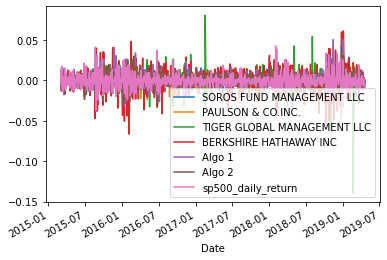

In [11]:
# Plot daily returns of all portfolios

combined_return.plot()

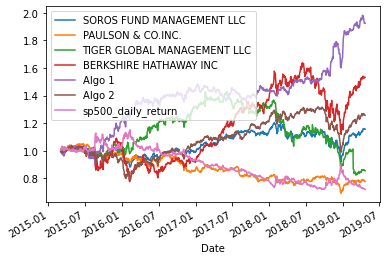

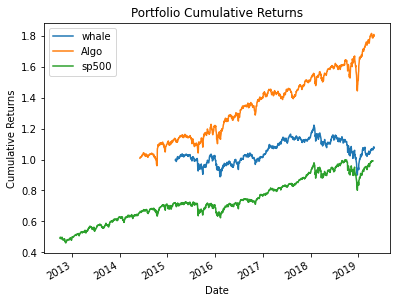

In [12]:
import matplotlib.pyplot as plt

# Calculate cumulative returns of all portfolios
cum_return = (1+combined_return).cumprod()
cum_return.plot();

# Each portfolios weight

whale_weights = [0.25, 0.25, 0.25, 0.25] 
algo_weights =[0.5, 0.5]
sp500_weights = [1]

# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return

whale_weights_returned = whale_drops.dot(whale_weights)
algo_weights_returned = algo_drops.dot(algo_weights)
sp500_weights_returned = sp500_daily_return.dot(sp500_weights)

# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end

whale_cumulative_returns = (1 + whale_weights_returned).cumprod()
algo_cumulative_returns = (1 + algo_weights_returned).cumprod()
sp500_cumulative_returns = (1 + sp500_weights_returned).cumprod()


# Plot cumulative returns
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
whale_cumulative_returns.plot()
algo_cumulative_returns.plot()
sp500_cumulative_returns.plot()
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.legend(["whale", "Algo","sp500"])



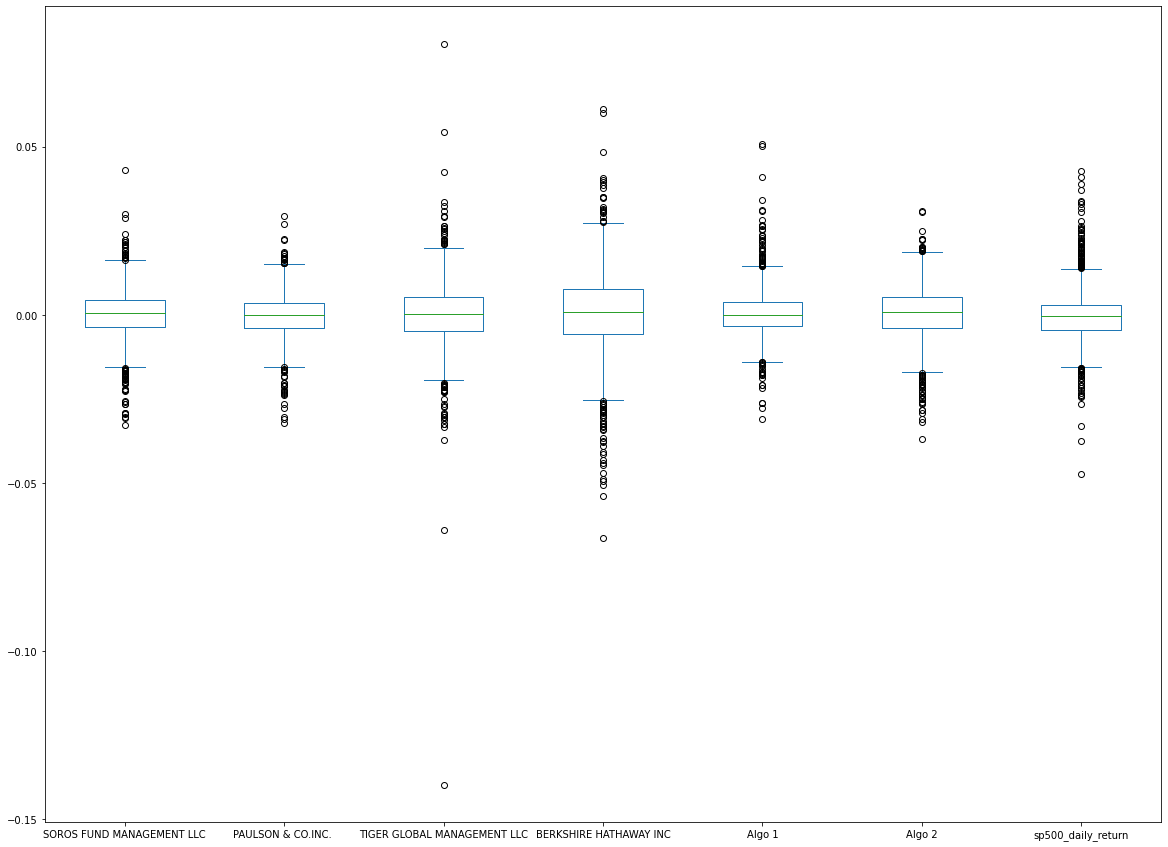

In [13]:
#Risk analysis
# Box plot to visually show risk
combined_return.plot.box(figsize=(20,15)); #; help clean up plot, 30 for wide, 15 for height

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500_daily_return             0.008587
dtype: float64


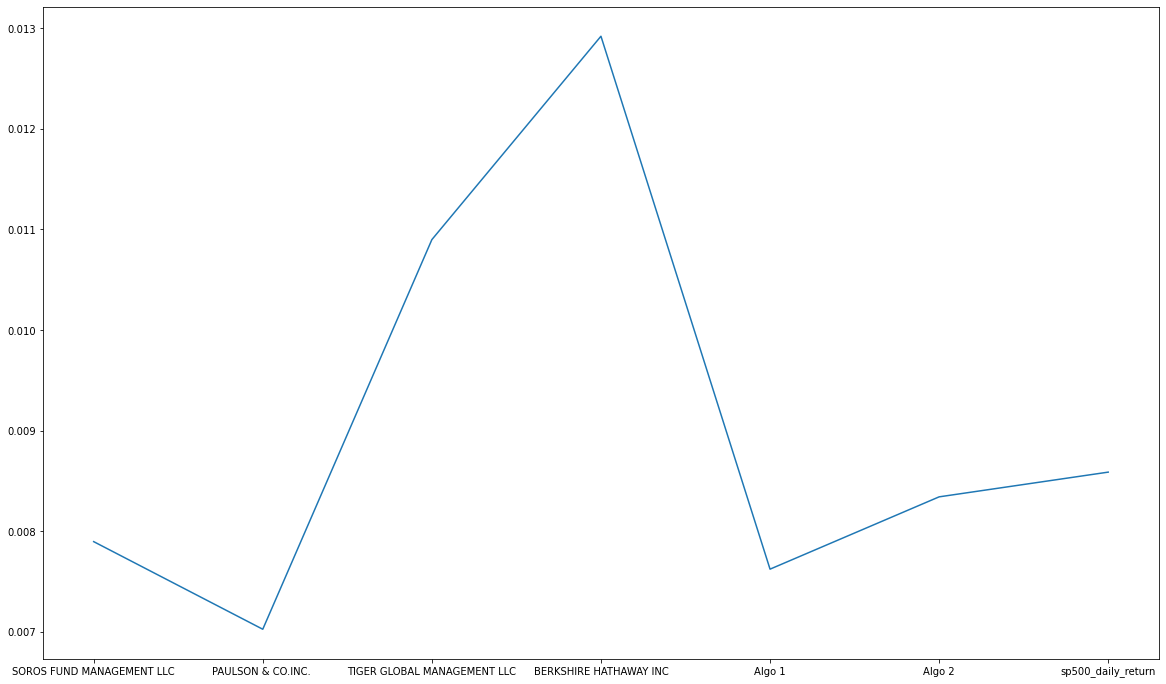

In [14]:
# Calculate the daily standard deviations of all portfolios
std_combined_return = combined_return.std()

print(std_combined_return)

combined_return.std().plot(figsize=(20,12));

In [15]:
# Determine which portfolios are riskier than the S&P 500

std_whale = whale_drops.std().mean()
print("standard deviations whale",std_whale)
std_algo = algo_drops.std().mean()
print("standard deviations algo",std_algo)
std_sp500 = sp500_daily_return.std().mean()
print("standard deviations sp500",std_sp500)

#whale portfolios has the highest standard deviations, which its portfolios are risker than algo porfolios

standard deviations whale 0.009618471706059247
standard deviations algo 0.008227087477314397
standard deviations sp500 0.008134642617809523


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.000017            0.000031   
2019-04-26                   0.000017            0.000032   
2019-04-29                   0.000017            0.000029   
2019-04-30                   0.000018            0.000029   
2019-05-01                   0.000018            0.000025   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                          NaN                     NaN  
2015-03-

<AxesSubplot:xlabel='Date'>

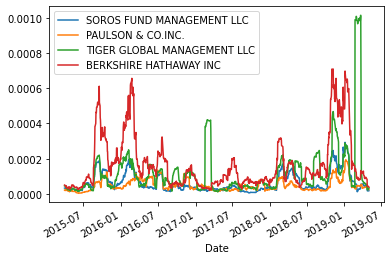

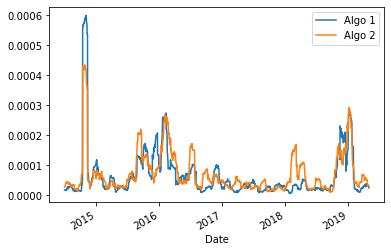

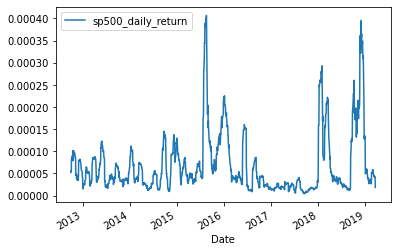

In [16]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_rolling_varinace = whale_drops.rolling(window=21).var()
print(whale_rolling_varinace)
algo_rolling_varinace = algo_drops.rolling(window=21).var()
print(algo_rolling_varinace)
sp500_rolling_varinace = sp500_daily_return.rolling(window=21).var()
print(sp500_rolling_varinace)

# Plot the rolling standard deviation
whale_rolling_varinace.plot()
algo_rolling_varinace.plot()
sp500_rolling_varinace.plot()

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
sp500_daily_return                            0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2         

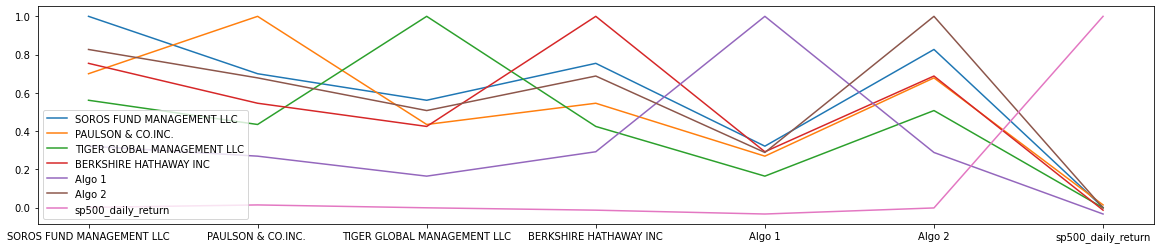

In [17]:
# Calculate the correlation

correlation = combined_return.corr()

# Display de correlation matrix

print(correlation)
correlation.plot(figsize=(20,4));

Algo 1 Date
2015-03-31    2.276605e-05
2015-04-01    2.400399e-05
2015-04-02    2.311979e-05
2015-04-06    2.409485e-05
2015-04-07    2.280376e-05
                  ...     
2019-04-15    2.228803e-06
2019-04-16    6.931243e-07
2019-04-17    1.475664e-06
2019-04-18   -3.277645e-06
2019-04-22   -2.295934e-06
Length: 1022, dtype: float64
Algo 2 Date
2015-03-31    1.093295e-05
2015-04-01    1.045390e-05
2015-04-02    8.980385e-06
2015-04-06    6.711557e-06
2015-04-07    4.792429e-06
                  ...     
2019-04-15    4.460041e-06
2019-04-16    4.005201e-06
2019-04-17    4.318561e-06
2019-04-18    4.636780e-06
2019-04-22    5.930848e-07
Length: 1022, dtype: float64
sp500_variance 7.373467552840441e-05
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.030227
2019-04-16    0.009400
2019-04-17    0.020013
2019-04-18   -0.044452
2019-04-22   -0.031138
Length: 1042, dtype: float64


<AxesSubplot:xlabel='Date'>

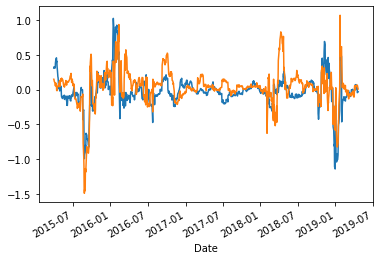

In [99]:
# Calculate covariance of a single portfolio

algo1_covariance = combined_return['Algo 1'].rolling(window=21).cov(combined_return['sp500_daily_return'])
algo2_covariance = combined_return['Algo 2'].rolling(window=21).cov(combined_return['sp500_daily_return'])
algo1_covariance_drop=algo1_covariance.dropna()
algo2_covariance_drop=algo2_covariance.dropna()
print("Algo 1",algo1_covariance_drop)
print("Algo 2",algo2_covariance_drop)

# Calculate variance of S&P 500

combined_return['sp500_daily_return']=combined_return['sp500_daily_return'].to_frame()
sp500_variance = combined_return['sp500_daily_return'].var()

#sp500_variance_drop = sp500_variance.dropna()
print("sp500_variance",sp500_variance)

# Computing beta

Algo1_beta = algo1_covariance / sp500_variance
Algo2_beta = algo2_covariance / sp500_variance
print(Algo1_beta)

# Plot beta trend

Algo1_beta.plot()
Algo2_beta.plot()


In [19]:
#Use `ewm` to calculate the rolling window

Algo_1_ewm = combined_return['Algo 1'].ewm(alpha=0.02, min_periods=10).corr(combined_return['sp500_daily_return'])
Algo_2_ewm = combined_return['Algo 2'].ewm(alpha=0.02, min_periods=10).corr(combined_return['sp500_daily_return'])
print("Algo_1_ewm",Algo_1_ewm)
print("Algo_2_ewm",Algo_2_ewm)

Algo_1_ewm Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.071625
2019-04-16   -0.078170
2019-04-17   -0.074418
2019-04-18   -0.074349
2019-04-22   -0.073273
Length: 1042, dtype: float64
Algo_2_ewm Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.061960
2019-04-16   -0.060312
2019-04-17   -0.058915
2019-04-18   -0.058823
2019-04-22   -0.052506
Length: 1042, dtype: float64


In [20]:
# Annualized Sharpe Ratios
#window for 21 days of trading
mean = combined_return.mean()
volatility = combined_return.rolling(window=21).std() *np.sqrt(21)
#print(mean)
#print(volatility)
sharpe_ratios = mean / volatility
sharpe_ratios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_return
Date,,,,,,,
2019-04-15,0.005470,-0.007625,-0.002592,0.011075,0.026113,0.007334,-0.009371
2019-04-16,0.005546,-0.007625,-0.002589,0.011073,0.024917,0.007874,-0.009316
2019-04-17,0.005495,-0.007450,-0.002575,0.011359,0.023040,0.007751,-0.009410
2019-04-18,0.005612,-0.007530,-0.002661,0.011372,0.024601,0.007744,-0.009974
2019-04-22,0.006292,-0.007416,-0.003147,0.011835,0.024614,0.007808,-0.014229


<AxesSubplot:xlabel='Date'>

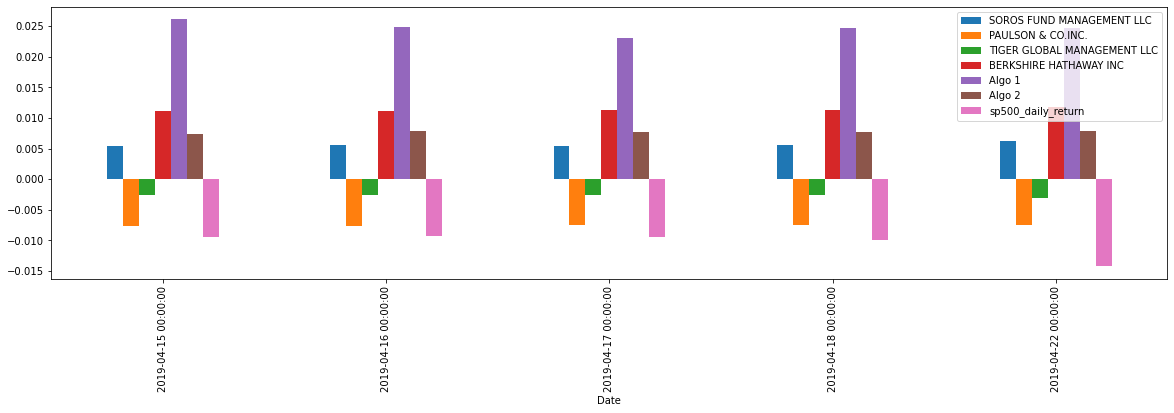

In [21]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios.tail().plot(figsize=(20,5),kind="bar")

#### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
#Algo 1 outperform whales portfolios

In [22]:
# Reading data from 1st stock

bx = pd.read_csv('bx_csv.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# count nulls

bx_nulls = bx.isna().sum()
print(bx_nulls)

# drop nulls

bx_drops = bx.dropna(how='all')
print(bx_drops)

Close    0
dtype: int64
                     Close
Date                      
2018-05-11 16:00:00  31.47
2018-05-14 16:00:00  31.18
2018-05-15 16:00:00  31.10
2018-05-16 16:00:00  31.29
2018-05-17 16:00:00  31.45
...                    ...
2019-05-13 16:00:00  38.80
2019-05-14 16:00:00  39.39
2019-05-15 16:00:00  39.58
2019-05-16 16:00:00  40.40
2019-05-17 16:00:00  40.65

[256 rows x 1 columns]


In [23]:
# Reading data from 2nd stock

cgc = pd.read_csv('cgc_csv.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# count nulls

cgc_nulls = cgc.isnull().sum()
#count_whale_nulls = len(whale) - whale.count()
#print(count_whale_nulls)
print(cgc_nulls)

# drop nulls

cgc_drops = cgc.dropna(how='all')
print(cgc_drops)

Close    0
dtype: int64
                     Close
Date                      
2018-05-11 16:00:00  23.71
2018-05-14 16:00:00  25.25
2018-05-15 16:00:00  25.31
2018-05-16 16:00:00  25.02
2018-05-17 16:00:00  25.86
...                    ...
2019-05-13 16:00:00  43.76
2019-05-14 16:00:00  45.30
2019-05-15 16:00:00  45.40
2019-05-16 16:00:00  45.05
2019-05-17 16:00:00  44.61

[256 rows x 1 columns]


In [24]:
# Reading data from 3rd stock

sp500 = pd.read_csv('sp500_csv.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# count nulls

sp500_nulls = sp500.isnull().sum()
#count_whale_nulls = len(whale) - whale.count()
#print(count_whale_nulls)
print(sp500_nulls)

# drop nulls

sp500_drops = sp500.dropna(how='all')
print(sp500_drops)

Close    0
dtype: int64
                       Close
Date                        
2018-05-11 16:00:00  2727.72
2018-05-14 16:00:00  2730.13
2018-05-15 16:00:00  2711.45
2018-05-16 16:00:00  2722.46
2018-05-17 16:00:00  2720.13
...                      ...
2019-05-13 16:00:00  2811.87
2019-05-14 16:00:00  2834.41
2019-05-15 16:00:00  2850.96
2019-05-16 16:00:00  2876.32
2019-05-17 16:00:00  2859.53

[256 rows x 1 columns]


In [25]:
# Rename `Close` Column to be specific to this portfolio.
# Reorganize portfolio data by having a column per symbol

sp500_drops.rename(columns = {'Close':'sp500_close'}, inplace = True)
print(sp500_drops.head())


cgc_drops.rename(columns ={'Close':'cgc_close'}, inplace = True)
print(cgc_drops.head())

bx_drops.rename(columns = {'Close':'bx_close'}, inplace = True)
print(bx_drops.head())

                     sp500_close
Date                            
2018-05-11 16:00:00      2727.72
2018-05-14 16:00:00      2730.13
2018-05-15 16:00:00      2711.45
2018-05-16 16:00:00      2722.46
2018-05-17 16:00:00      2720.13
                     cgc_close
Date                          
2018-05-11 16:00:00      23.71
2018-05-14 16:00:00      25.25
2018-05-15 16:00:00      25.31
2018-05-16 16:00:00      25.02
2018-05-17 16:00:00      25.86
                     bx_close
Date                         
2018-05-11 16:00:00     31.47
2018-05-14 16:00:00     31.18
2018-05-15 16:00:00     31.10
2018-05-16 16:00:00     31.29
2018-05-17 16:00:00     31.45


In [26]:
# Combine all stocks in a single DataFrame

combined_all = pd.concat([sp500_drops, cgc_drops, bx_drops], axis="columns", join="inner")

combined_all.dropna()
combined_all.head()
#print(combined_return)

,sp500_close,cgc_close,bx_close
Date,,,
2018-05-11 16:00:00,2727.72,23.71,31.47
2018-05-14 16:00:00,2730.13,25.25,31.18
2018-05-15 16:00:00,2711.45,25.31,31.10
2018-05-16 16:00:00,2722.46,25.02,31.29
2018-05-17 16:00:00,2720.13,25.86,31.45


In [27]:
# Reset datetime index in ascending order (past to present)

combined_all.sort_index(inplace=True)
combined_all

,sp500_close,cgc_close,bx_close
Date,,,
2018-05-11 16:00:00,2727.72,23.71,31.47
2018-05-14 16:00:00,2730.13,25.25,31.18
2018-05-15 16:00:00,2711.45,25.31,31.10
2018-05-16 16:00:00,2722.46,25.02,31.29
2018-05-17 16:00:00,2720.13,25.86,31.45
...,...,...,...
2019-05-13 16:00:00,2811.87,43.76,38.80
2019-05-14 16:00:00,2834.41,45.30,39.39
2019-05-15 16:00:00,2850.96,45.40,39.58


In [28]:
#Calcualate daily return

#pct.change() is calculating the changes between the current and prior element
sp500_cal_daily_return = sp500_drops["sp500_close"].pct_change()
cgc_cal_daily_return = cgc_drops["cgc_close"].pct_change()
bx_cal_daily_return = bx_drops["bx_close"].pct_change()

#sp500_cal_daily_return[1:] is ignore the first raw since the first raw date is null.
sp500_cal_daily_return = sp500_cal_daily_return[1:]
cgc_cal_daily_return = cgc_cal_daily_return[1:]
bx_cal_daily_return = bx_cal_daily_return[1:]

#display sample data
print(sp500_cal_daily_return.head())
print(cgc_cal_daily_return.head())
print(bx_cal_daily_return.head())

Date
2018-05-14 16:00:00    0.000884
2018-05-15 16:00:00   -0.006842
2018-05-16 16:00:00    0.004061
2018-05-17 16:00:00   -0.000856
2018-05-18 16:00:00   -0.002632
Name: sp500_close, dtype: float64
Date
2018-05-14 16:00:00    0.064951
2018-05-15 16:00:00    0.002376
2018-05-16 16:00:00   -0.011458
2018-05-17 16:00:00    0.033573
2018-05-18 16:00:00    0.082753
Name: cgc_close, dtype: float64
Date
2018-05-14 16:00:00   -0.009215
2018-05-15 16:00:00   -0.002566
2018-05-16 16:00:00    0.006109
2018-05-17 16:00:00    0.005113
2018-05-18 16:00:00    0.000000
Name: bx_close, dtype: float64


In [29]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


In [30]:
import matplotlib.pyplot as plt

# Set weight

weights = [1/3, 1/3, 1/3] 

#combined all returned into one data frame

combined_all_returned = pd.concat([sp500_cal_daily_return, cgc_cal_daily_return, bx_cal_daily_return], axis='columns', join='inner')

# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_all_returned.dropna()
print(combined_all_returned.head())

# Calculated portfolio return

combined_all_returned_weight = combined_all_returned.dot(weights)

# Display sample data

print(combined_all_returned_weight.head())


# Plot cumulative returns
#fig = plt.figure()
#ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
#whale_cumulative_returns.plot()
#algo_cumulative_returns.plot()
#sp500_cumulative_returns.plot()
#ax1.set_xlabel('Date')
#ax1.set_ylabel("Cumulative Returns")
#ax1.set_title("Portfolio Cumulative Returns")
#plt.legend(["whale", "Algo","sp500"])



                     sp500_close  cgc_close  bx_close
Date                                                 
2018-05-14 16:00:00     0.000884   0.064951 -0.009215
2018-05-15 16:00:00    -0.006842   0.002376 -0.002566
2018-05-16 16:00:00     0.004061  -0.011458  0.006109
2018-05-17 16:00:00    -0.000856   0.033573  0.005113
2018-05-18 16:00:00    -0.002632   0.082753  0.000000
Date
2018-05-14 16:00:00    0.018873
2018-05-15 16:00:00   -0.002344
2018-05-16 16:00:00   -0.000429
2018-05-17 16:00:00    0.012610
2018-05-18 16:00:00    0.026707
dtype: float64


In [31]:
# Join your returns DataFrame to the original returns DataFrame



In [53]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_dataframe_combined_return = pd.concat([whale_drops, algo_drops, sp500_daily_return, sp500_cal_daily_return], axis="columns", join="inner")
#print(combined_return)
#print(combined_all_returned_weight)
#all_dataframe_combined = pd.concat([combined_return, combined_all_returned_weight])
#all_dataframe_combined_return.dropna()

print(all_dataframe_combined_return)

Empty DataFrame
Columns: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1, Algo 2, sp500_daily_return, sp500_close]
Index: []


sp500_close    0.009508
cgc_close      0.049918
bx_close       0.017046
dtype: float64


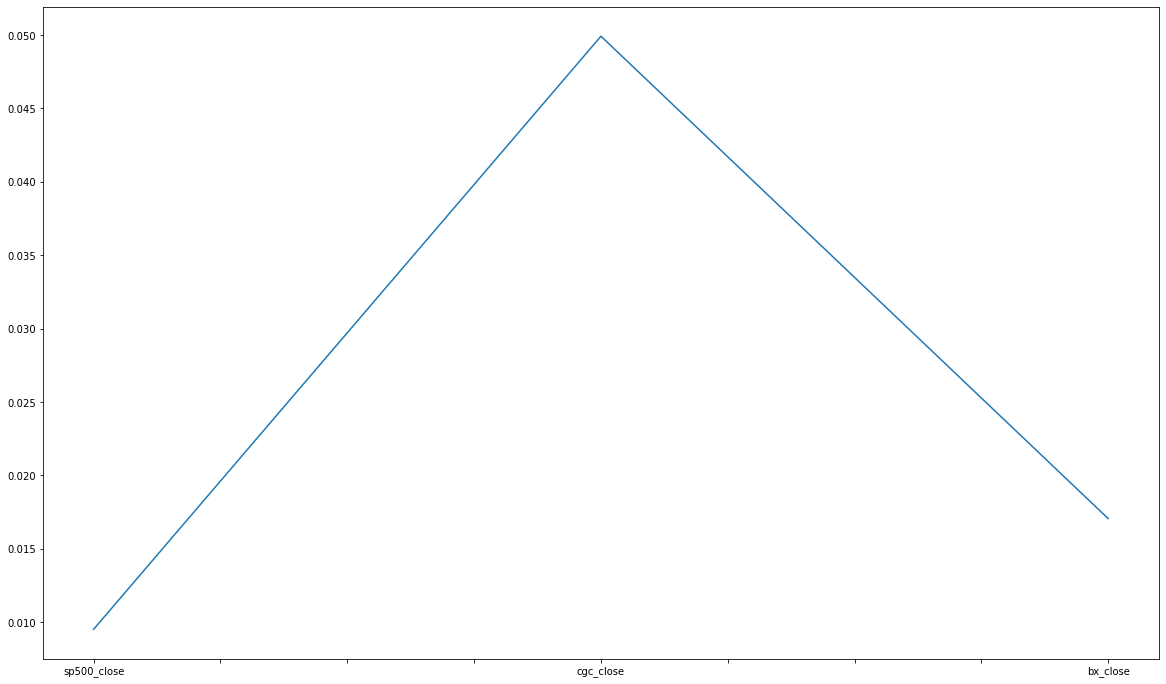

In [56]:
# Calculate the annualized `std`
std_combined_all_return = combined_all_returned.std()

print(std_combined_all_return)

#combined_all_returned.std().plot(figsize=(20,12));

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

Date
2018-05-14 16:00:00         NaN
2018-05-15 16:00:00         NaN
2018-05-16 16:00:00         NaN
2018-05-17 16:00:00         NaN
2018-05-18 16:00:00         NaN
                         ...   
2019-05-13 16:00:00    0.000059
2019-05-14 16:00:00    0.000060
2019-05-15 16:00:00    0.000063
2019-05-16 16:00:00    0.000067
2019-05-17 16:00:00    0.000068
Name: sp500_close, Length: 255, dtype: float64
Date
2018-05-14 16:00:00         NaN
2018-05-15 16:00:00         NaN
2018-05-16 16:00:00         NaN
2018-05-17 16:00:00         NaN
2018-05-18 16:00:00         NaN
                         ...   
2019-05-13 16:00:00    0.001427
2019-05-14 16:00:00    0.001346
2019-05-15 16:00:00    0.001259
2019-05-16 16:00:00    0.001251
2019-05-17 16:00:00    0.001229
Name: cgc_close, Length: 255, dtype: float64
Date
2018-05-14 16:00:00         NaN
2018-05-15 16:00:00         NaN
2018-05-16 16:00:00         NaN
2018-05-17 16:00:00         NaN
2018-05-18 16:00:00         NaN
                         ... 

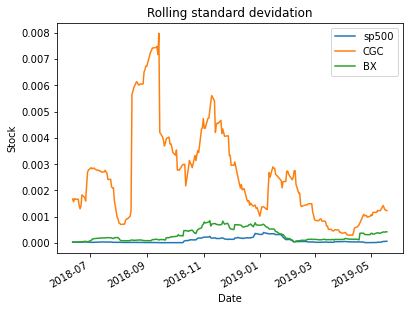

In [63]:
# Calculate the rolling standard deviation for using a 21-day window

sp500_rolling_varinace = sp500_cal_daily_return.rolling(window=21).var()
print(sp500_rolling_varinace)
cgc_rolling_varinace = cgc_cal_daily_return.rolling(window=21).var()
print(cgc_rolling_varinace)
bx_rolling_varinace = bx_cal_daily_return.rolling(window=21).var()
print(bx_rolling_varinace)

# Plot the rolling standard deviation
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sp500_rolling_varinace.plot()
cgc_rolling_varinace.plot()
bx_rolling_varinace.plot()
ax1.set_xlabel('Date')
ax1.set_ylabel("Stock")
ax1.set_title("Rolling standard devidation")
plt.legend(["sp500","CGC","BX"])

             sp500_close  cgc_close  bx_close
sp500_close     1.000000   0.225376  0.626489
cgc_close       0.225376   1.000000  0.257300
bx_close        0.626489   0.257300  1.000000


<AxesSubplot:>

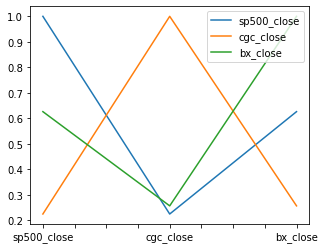

In [66]:
# Calculate and plot the correlation

correlation_picks = combined_all_returned.corr()

print(correlation_picks)
correlation_picks.plot(figsize=(5,4))

Date
2018-05-14 16:00:00         NaN
2018-05-15 16:00:00         NaN
2018-05-16 16:00:00         NaN
2018-05-17 16:00:00         NaN
2018-05-18 16:00:00         NaN
                         ...   
2019-05-13 16:00:00    0.116613
2019-05-14 16:00:00    0.119471
2019-05-15 16:00:00    0.127641
2019-05-16 16:00:00    0.122772
2019-05-17 16:00:00    0.129495
Length: 255, dtype: float64


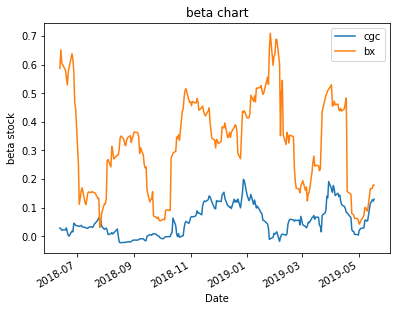

In [79]:
# Calculate and plot Beta

cgc_covariance = combined_all_returned['cgc_close'].rolling(window=21).cov(combined_all_returned['sp500_close'])
bx_covariance = combined_all_returned['bx_close'].rolling(window=21).cov(combined_all_returned['sp500_close'])

#print(cgc_covariance)
#Calculate variance

#cgc_variance = combined_all_returned['cgc_close'].var()
#bx_variance = combined_all_returned['bx_close'].var()

#Computing beta

cgc_beta= (cgc_covariance / cgc_rolling_varinace)
bx_beta = (bx_covariance / bx_rolling_varinace)

print(cgc_beta)

#Plot beta trend
import matplotlib.pyplot as plt
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
cgc_beta.plot()
bx_beta.plot()
ax2.set_xlabel('Date')
ax2.set_ylabel("beta stock")
ax2.set_title("beta chart")
plt.legend(["cgc","bx"])




sp500_close    0.000230
cgc_close      0.003690
bx_close       0.001149
dtype: float64
                     sp500_close  cgc_close  bx_close
Date                                                 
2018-05-14 16:00:00          NaN        NaN       NaN
2018-05-15 16:00:00          NaN        NaN       NaN
2018-05-16 16:00:00          NaN        NaN       NaN
2018-05-17 16:00:00          NaN        NaN       NaN
2018-05-18 16:00:00          NaN        NaN       NaN
...                          ...        ...       ...
2019-05-13 16:00:00          NaN        NaN       NaN
2019-05-14 16:00:00     0.151362   0.796948  0.271425
2019-05-15 16:00:00     0.151465   0.794580  0.271256
2019-05-16 16:00:00     0.151546   0.794659  0.271939
2019-05-17 16:00:00     0.151622   0.794629  0.271940

[255 rows x 3 columns]
                     sp500_close  cgc_close  bx_close
Date                                                 
2019-05-14 16:00:00     0.001520   0.004630  0.004233
2019-05-15 16:00:00     0

<AxesSubplot:xlabel='Date'>

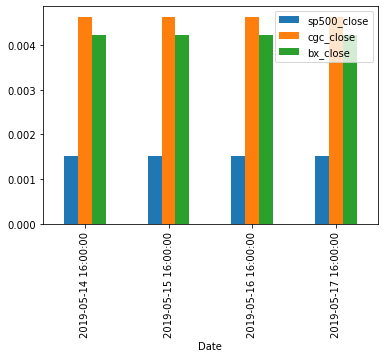

In [91]:
# Calculate Annualized Sharpe Ratios

mean_pick= combined_all_returned.mean()

volatility_pick = combined_all_returned.rolling(window=252).std() * np.sqrt(252)
print(mean_pick)
print(volatility_pick)

sharpe_ratios_pick = mean_pick / volatility_pick
sharpe_ratios_pick_drops=sharpe_ratios_pick.dropna()
print(sharpe_ratios_pick_drops)

# Visualize the sharpe ratios as a bar plot

sharpe_ratios_pick_drops.plot.bar()

In [ ]:
### How does your portfolio do?

#BX and CGC are doing great during 2018 to 2019 comparing to whale portfolio and algo portfolio.